In [158]:
import torch 
import torchvision.transforms as T 
import numpy as np
from models.autoencoder.auto import Auto
from PIL import Image
import matplotlib.pyplot as plt

In [159]:
#Load model
device=torch.device("mps")
model=Auto().to(device=device)

model.eval()
model.load_state_dict(torch.load("./weights/autoencoder/run_1/model540.pth"))

<All keys matched successfully>

In [164]:
#get an image
img=Image.open("errors/3c29743f08050b61d47932842126a37c60ad84d46a77f5cdc4dbb7b058095786.png")
transforms=T.Compose([T.Resize(size=(1024,1024)),T.ToTensor(),T.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

img_tensor=transforms(img)
img_tensor=img_tensor.to(device=device)

img_tensor=img_tensor.view(1,img_tensor.size(0),img_tensor.size(1),img_tensor.size(2))


In [165]:
#pass to model and get outputs and post-process

prediction=model(img_tensor)

prediction=prediction.to(device=torch.device("cpu"))
prediction_np=prediction.detach().numpy()


prediction_np=np.round((prediction_np+1)*255)//2

prediction_np=prediction_np.astype(np.uint8)
prediction_rgb=prediction_np.transpose(0,2,3,1)

Text(0.5, 1.0, 'Corrected Image')

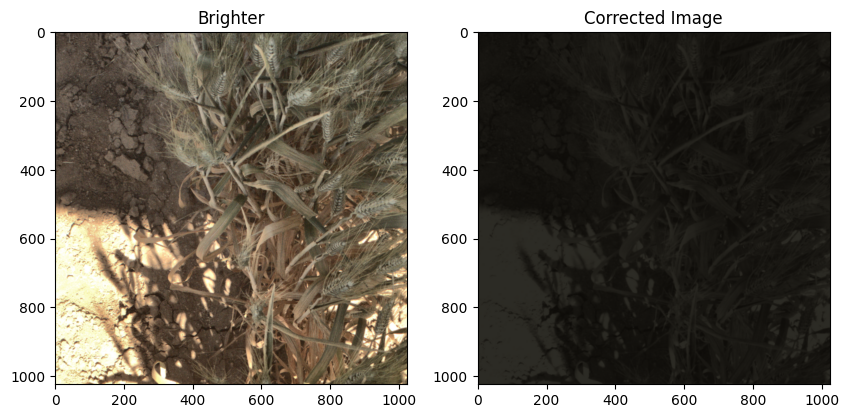

In [166]:
fig=plt.figure(figsize=(10,10))

ax1=fig.add_subplot(1,2,1)
ax1.imshow(np.array(img))
ax1.set_title("Brighter")

ax2=fig.add_subplot(1,2,2)
ax2.imshow(prediction_rgb[0])
ax2.set_title("Corrected Image")

In [167]:
#save as png
im=Image.fromarray(prediction_rgb[0])
im.save("test.png")